# Introdução às Redes Neurais Artificiais

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
per_clf = Perceptron()
per_clf.fit(x_train, y_train)
y_pred = per_clf.predict([[2, 0.5, 1.4, 0.2]])

In [5]:
y_pred

array([1])

In [6]:
per_clf.score(x_test, y_test)

0.5333333333333333

In [7]:
per_clf = Perceptron()
scores = cross_val_score(per_clf, x, y, cv=5)
scores

array([0.66666667, 0.7       , 0.76666667, 0.83333333, 0.66666667])

In [8]:
scores.mean()

0.7266666666666667

### Keras e Tensorflow

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
tf.__version__

'2.15.0'

In [12]:
fashion_mnist = keras.datasets.fashion_mnist

In [13]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [14]:
x_train_full.shape

(60000, 28, 28)

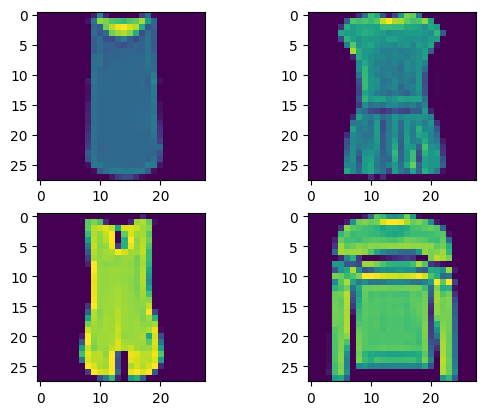

In [15]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(x_train_full[2])
axes[0, 1].imshow(x_train_full[3])
axes[1, 0].imshow(x_train_full[4])
axes[1, 1].imshow(x_train_full[5]);

In [16]:
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [18]:
class_names[y_train[0]]

'Coat'

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
hidden1 = model.layers[1]

In [22]:
hidden1.name

'dense'

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights, biases

(array([[-6.9762617e-03, -1.3822116e-02, -6.7234948e-02, ...,
         -6.8796568e-02,  4.7716409e-02,  5.9423909e-02],
        [ 3.9824173e-03,  5.2414954e-02,  1.9003399e-02, ...,
          7.1982786e-02,  5.0448902e-02, -5.1698960e-02],
        [ 5.6706339e-02, -6.0768683e-02,  2.1375716e-05, ...,
         -6.6011444e-02, -5.9431035e-02,  1.3600782e-02],
        ...,
        [ 1.7170578e-02,  6.1893255e-02, -1.4161229e-02, ...,
         -6.4782418e-02, -9.2888027e-03, -2.4064858e-02],
        [-3.3090711e-02,  7.1592227e-02,  6.6263005e-02, ...,
          5.6010246e-02, -1.7038431e-02, -4.1939318e-04],
        [-3.2388330e-02,  1.7602779e-02,  6.2281325e-02, ...,
         -3.0487850e-03, -1.9294493e-02,  1.9959889e-02]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.

In [25]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [26]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 5s 3ms/step - loss: 0.7058 - accuracy: 0.7697 - val_loss: 0.5259 - val_accuracy: 0.8166
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4888 - accuracy: 0.8298 - val_loss: 0.4520 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4449 - accuracy: 0.8441 - val_loss: 0.4431 - val_accuracy: 0.8498
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4191 - accuracy: 0.8543 - val_loss: 0.4062 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4005 - accuracy: 0.8602 - val_loss: 0.3803 - val_accuracy: 0.8714
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3838 - accuracy: 0.8657 - val_loss: 0.3780 - val_accuracy: 0.8704
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3705 - accuracy: 0.8701 - val_loss: 0.3740 - val_accurac

In [27]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

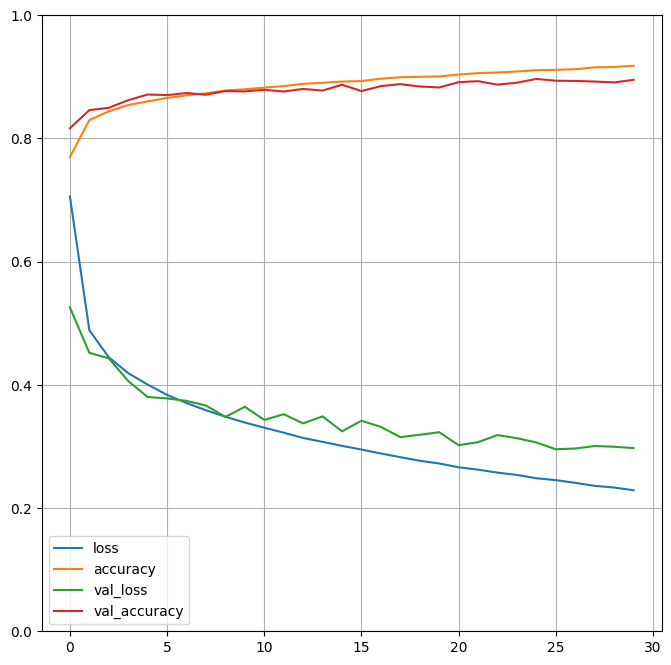

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.9711 - accuracy: 0.8570


[59.9710807800293, 0.8569999933242798]

In [30]:
x_new = x_test[:3]

In [31]:
y_proba = model.predict(x_new)

1/1 [==============================] - 0s 134ms/step


In [32]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
x_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [34]:
y_pred = model.predict(x_new)
y_pred

1/1 [==============================] - 0s 48ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Regressão

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [37]:
housing = fetch_california_housing()

In [38]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [39]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [41]:
model = Sequential()
model.add(Dense(30, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(1))

In [42]:
model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.Adam())

In [43]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20


363/363 [==============================] - 1s 2ms/step - loss: 1.5640 - val_loss: 0.7686
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6744 - val_loss: 0.5439
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5186 - val_loss: 0.4740
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4609 - val_loss: 0.4330
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4340 - val_loss: 0.4106
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4177 - val_loss: 0.3947
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4046 - val_loss: 0.3865
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3970 - val_loss: 0.3857
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3914 - val_loss: 0.3787
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3881 - val_loss: 0.3692
Epoch 11/2

In [44]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3632


In [45]:
x_new = x_test[:3]
y_pred = model.predict(x_new)

1/1 [==============================] - 0s 71ms/step


<Axes: >

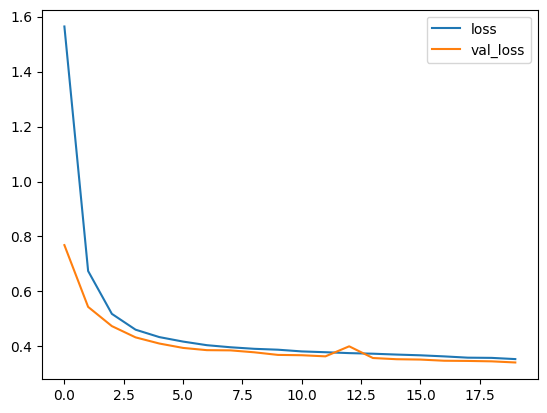

In [46]:
pd.DataFrame(history.history).plot()

In [47]:
x_train.shape

(11610, 8)

In [78]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [79]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 30)                   270       ['input_2[0][0]']             
                                                                                                  
 dense_15 (Dense)            (None, 30)                   930       ['dense_14[0][0]']            
                                                                                                  
 concatenate_3 (Concatenate  (None, 38)                   0         ['input_2[0][0]',             
 )                                                                   'dense_15[0][0]']      

In [80]:
model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.R2Score()])

In [81]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 2s 2ms/step - loss: 1.0768 - r2_score: 0.1856 - val_loss: 0.5260 - val_r2_score: 0.5909
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4808 - r2_score: 0.6363 - val_loss: 0.4208 - val_r2_score: 0.6728
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4249 - r2_score: 0.6786 - val_loss: 0.3938 - val_r2_score: 0.6937
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3937 - r2_score: 0.7022 - val_loss: 0.3795 - val_r2_score: 0.7049
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3866 - r2_score: 0.7076 - val_loss: 0.3693 - val_r2_score: 0.7128
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3713 - r2_score: 0.7192 - val_loss: 0.3703 - val_r2_score: 0.7120
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3681 - r2_score: 0.7216 - val_loss: 0.3611 - val_r2_score: 0.7192
Epoch 

<Axes: >

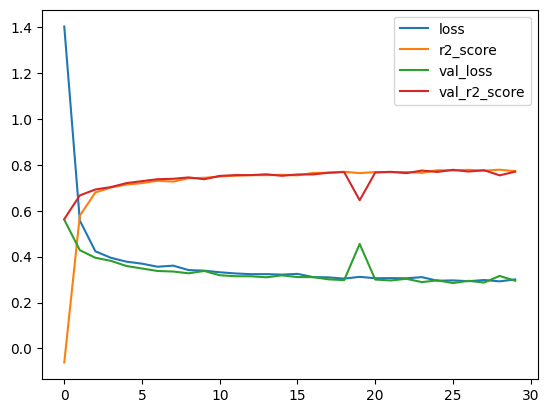

In [52]:
pd.DataFrame(history.history).plot()

In [53]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3158 - r2_score: 0.7723


[0.3157655894756317, 0.7722562551498413]

In [54]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [55]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [56]:
model.compile(
    loss=["mse", "mse"],loss_weights=[0.9, 0.1], metrics=[tf.keras.metrics.R2Score()]
)

In [57]:
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20, validation_data=([
    x_valid_A, x_valid_B
], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.4686 - main_output_loss: 1.3761 - aux_output_loss: 2.3006 - main_output_r2_score: -0.0408 - aux_output_r2_score: -0.7400 - val_loss: 0.5424 - val_main_output_loss: 0.5011 - val_aux_output_loss: 0.9142 - val_main_output_r2_score: 0.6103 - val_aux_output_r2_score: 0.2890
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4944 - main_output_loss: 0.4659 - aux_output_loss: 0.7511 - main_output_r2_score: 0.6477 - aux_output_r2_score: 0.4319 - val_loss: 0.4335 - val_main_output_loss: 0.4153 - val_aux_output_loss: 0.5972 - val_main_output_r2_score: 0.6770 - val_aux_output_r2_score: 0.5355
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4432 - main_output_loss: 0.4206 - aux_output_loss: 0.6462 - main_output_r2_score: 0.6819 - aux_output_r2_score: 0.5113 - val_loss: 0.4095 - val_main_output_loss: 0.3944 - val_aux_output_loss: 0.5454 - val_main_output_r2_score: 0.6932 

<Axes: >

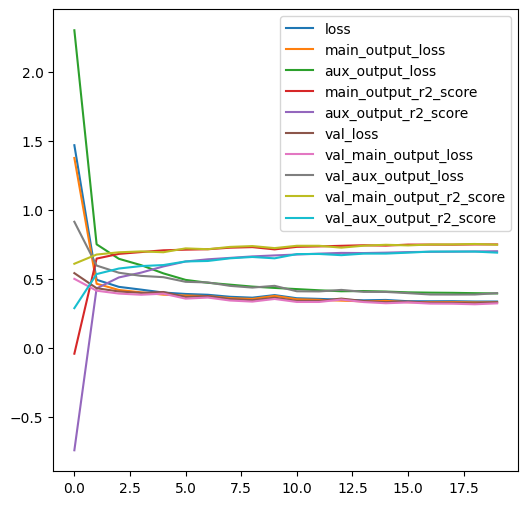

In [58]:
pd.DataFrame(history.history).plot(figsize=(6, 6))

### Usando a Subclassing API para construir Modelos Dinâmicos

In [59]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [60]:
model = WideAndDeepModel()

In [61]:
model.call([input_A, input_B])

(<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_12')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_13')>)

In [62]:
model.compile(
    loss=["mse", "mse"],loss_weights=[0.9, 0.1], metrics=[tf.keras.metrics.R2Score()]
)

In [63]:
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20, validation_data=([
    x_valid_A, x_valid_B
], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.4574 - output_1_loss: 1.2933 - output_2_loss: 2.9339 - output_1_r2_score: 0.0219 - output_2_r2_score: -1.2190 - val_loss: 0.5846 - val_output_1_loss: 0.5050 - val_output_2_loss: 1.3010 - val_output_1_r2_score: 0.6072 - val_output_2_r2_score: -0.0119
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5219 - output_1_loss: 0.4731 - output_2_loss: 0.9616 - output_1_r2_score: 0.6422 - output_2_r2_score: 0.2727 - val_loss: 0.4532 - val_output_1_loss: 0.4262 - val_output_2_loss: 0.6963 - val_output_1_r2_score: 0.6685 - val_output_2_r2_score: 0.4585
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4500 - output_1_loss: 0.4278 - output_2_loss: 0.6498 - output_1_r2_score: 0.6764 - output_2_r2_score: 0.5085 - val_loss: 0.4218 - val_output_1_loss: 0.4059 - val_output_2_loss: 0.5649 - val_output_1_r2_score: 0.6843 - val_output_2_r2_score: 0.5606
Epoch 4/20
363/363 [======

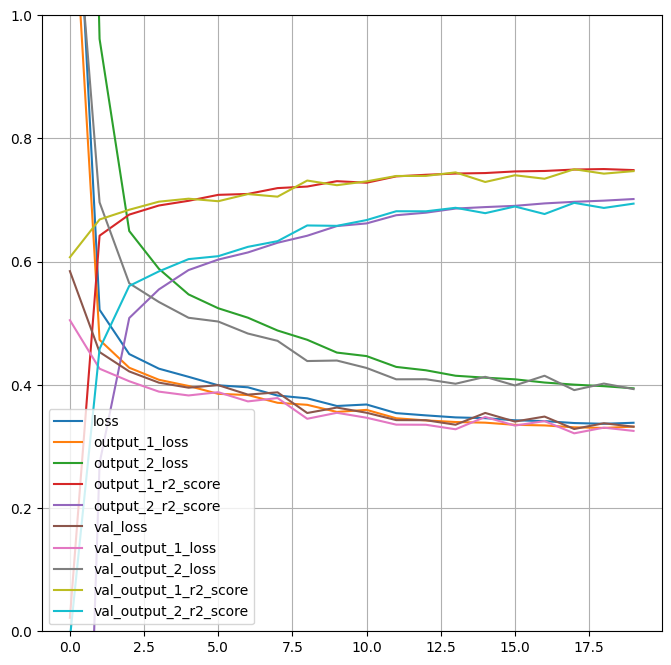

In [64]:
pd.DataFrame(history.history).plot(figsize=(8, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [67]:
#model.save("models/my_keras_model.h5")
#model.save_weights("models/weights/my_keras_model_weights.h5")

In [68]:
model

In [82]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [83]:
model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.R2Score()])

In [84]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 2s 2ms/step - loss: 1.6385 - r2_score: -0.2392 - val_loss: 0.6347 - val_r2_score: 0.5064
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7098 - r2_score: 0.4631 - val_loss: 0.4417 - val_r2_score: 0.6564
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4359 - r2_score: 0.6703 - val_loss: 0.3902 - val_r2_score: 0.6965
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3937 - r2_score: 0.7022 - val_loss: 0.3759 - val_r2_score: 0.7076
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3777 - r2_score: 0.7143 - val_loss: 0.3620 - val_r2_score: 0.7185
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3675 - r2_score: 0.7221 - val_loss: 0.3508 - val_r2_score: 0.7271
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3567 - r2_score: 0.7302 - val_loss: 0.3467 - val_r2_score: 0.7303
Epoch

In [85]:
model.save("models/my_keras_model.h5")

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/my_keras_model_callbacks.h5", save_best_only=True)
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/30


363/363 [==============================] - 1s 2ms/step - loss: 0.2523 - r2_score: 0.8092 - val_loss: 0.2755 - val_r2_score: 0.7857
Epoch 2/30
 93/363 [======>.......................] - ETA: 0s - loss: 0.2479 - r2_score: 0.8131

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 2ms/step - loss: 0.2526 - r2_score: 0.8089 - val_loss: 0.2672 - val_r2_score: 0.7921
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2525 - r2_score: 0.8090 - val_loss: 0.2768 - val_r2_score: 0.7847
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2526 - r2_score: 0.8089 - val_loss: 0.2827 - val_r2_score: 0.7801
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2520 - r2_score: 0.8094 - val_loss: 0.2658 - val_r2_score: 0.7932
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2526 - r2_score: 0.8090 - val_loss: 0.2734 - val_r2_score: 0.7873
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2818 - r2_score: 0.7869 - val_loss: 0.2796 - val_r2_score: 0.7825
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2550 - r2_score: 0.8072 - val_loss: 0.2852 - val_r2_score: 0.7782
Epoch 9/30
363/36

In [98]:
#model = tf.keras.models.load_model("models/my_keras_model_callbacks.h5")

In [170]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [171]:
root_logdir

'.\\my_logs'

In [172]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [173]:
run_logdir = get_run_logdir()

In [198]:
tensorboard_cb = keras.callbacks.TensorBoard("")

In [199]:
!rm -rf train validation

In [200]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2440 - r2_score: 0.8155 - val_loss: 0.2727 - val_r2_score: 0.7879
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2411 - r2_score: 0.8177 - val_loss: 0.2655 - val_r2_score: 0.7935
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2418 - r2_score: 0.8171 - val_loss: 0.2659 - val_r2_score: 0.7932
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2414 - r2_score: 0.8174 - val_loss: 0.2664 - val_r2_score: 0.7928
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2423 - r2_score: 0.8168 - val_loss: 0.2643 - val_r2_score: 0.7944
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2403 - r2_score: 0.8183 - val_loss: 0.2682 - val_r2_score: 0.7914
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2407 - r2_score: 0.8180 - val_loss: 0.2627 - val_r2_score: 0.7957
Epoch 

In [202]:
import tensorflow as tf

## Exercícios

In [247]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [240]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [207]:
data = mnist.load_data()

In [287]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [288]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

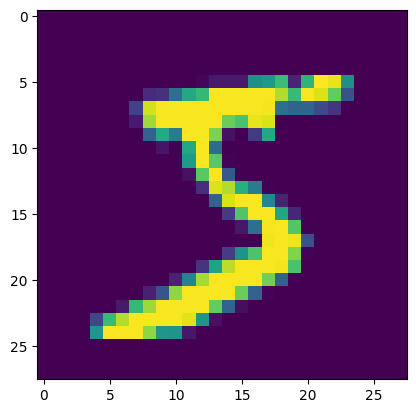

In [289]:
plt.imshow(x_train[0])

In [290]:
pd.DataFrame(y).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [291]:
x.shape

(60000, 28, 28)

In [303]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [304]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_58 (Dense)            (None, 300)               235500    
                                                                 
 dense_59 (Dense)            (None, 300)               90300     
                                                                 
 dense_60 (Dense)            (None, 300)               90300     
                                                                 
 dense_61 (Dense)            (None, 10)                3010      
                                                                 
Total params: 419110 (1.60 MB)
Trainable params: 419110 (1.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [305]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [308]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_lr=0.0001
)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[lr_callback])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0718 - accuracy: 0.9825 - val_loss: 0.1034 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0642 - accuracy: 0.9854 - val_loss: 0.1414 - val_accuracy: 0.9734 - lr: 0.0010
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0580 - accuracy: 0.9861 - val_loss: 0.1515 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0660 - accuracy: 0.9853 - val_loss: 0.1156 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0521 - accuracy: 0.9880 - val_loss: 0.1502 - val_accuracy: 0.9749 - lr: 0.0010
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0622 - accuracy: 0.9864 - val_loss: 0.1632 - val_accuracy: 0.9718 - lr: 0.0010
Epoch 7/10
1875/1875 [==============================] - 7s

<Axes: >

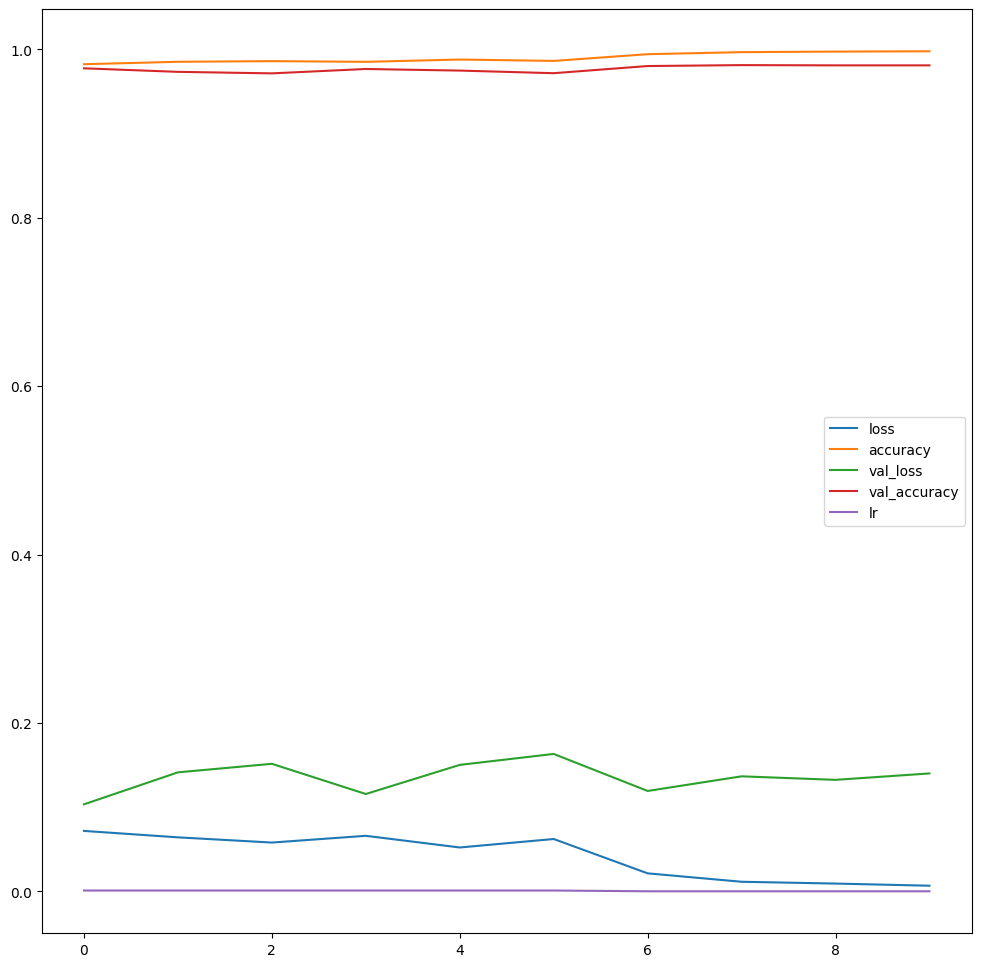

In [310]:
pd.DataFrame(history.history).plot(figsize=(12, 12))